In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
np.random.seed(0)

In [2]:
auto = pd.read_csv('Auto.csv')
#check data has been read in properly
auto=auto.sort_values(by='horsepower')
auto

,mpg,horsepower
19,26.0,46
101,26.0,46
324,43.4,48
323,44.3,48
242,43.1,48
...,...,...
6,14.0,220
8,14.0,225
94,12.0,225
13,14.0,225


In [3]:
y=auto['mpg'].values
x=auto['horsepower'].values.reshape(-1,1)

In [4]:
#Fit a linear regression Model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

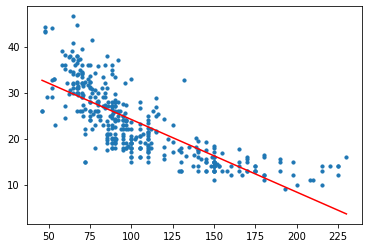

In [5]:
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)
print(mse)
print(r2)

23.943662938603108
0.6059482578894348


In [7]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[1.0000e+00, 4.6000e+01, 2.1160e+03],
       [1.0000e+00, 4.6000e+01, 2.1160e+03],
       [1.0000e+00, 4.8000e+01, 2.3040e+03],
       ...,
       [1.0000e+00, 2.2500e+02, 5.0625e+04],
       [1.0000e+00, 2.2500e+02, 5.0625e+04],
       [1.0000e+00, 2.3000e+02, 5.2900e+04]])

In [8]:
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)

In [9]:
mse = mean_squared_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print(mse)
print(r2)

18.98476890761722
0.6875590305127516


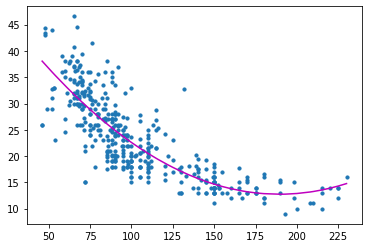

In [10]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)
polymodel = LinearRegression()
polymodel.fit(x_poly, y)
y_poly_pred = polymodel.predict(x_poly)
mse = mean_squared_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print(mse)
print(r2)

18.426968586754008
0.6967390038839772


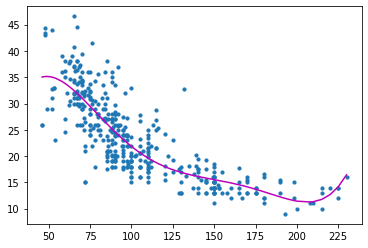

In [12]:
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [13]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on validation data-set
  y_valid_predict = poly_model.predict(poly_features.fit_transform(X_valid))
  
  # evaluating the model on training dataset
  mse_train = mean_squared_error(Y_train, y_train_predicted)
  
  # evaluating the model on validation dataset
  mse_valid = mean_squared_error(Y_valid, y_valid_predict)
   
  return (mse_train,mse_valid,degree)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.5, random_state=1)

In [15]:
a=[]
for i in range(1,11):
    a.append(create_polynomial_regression_model(i))
df = pd.DataFrame(a,columns=['Training Error','Validation Error','Degree'])
df

,Training Error,Validation Error,Degree
0,25.449652,23.052629,1
1,20.036058,18.428337,2
2,19.940027,18.358764,3
3,19.838801,18.339832,4
4,19.650098,17.682137,5
5,19.558002,17.595398,6
6,19.657113,17.773436,7
7,19.720388,17.849770,8
8,19.695831,18.044803,9
9,19.635441,20.530601,10


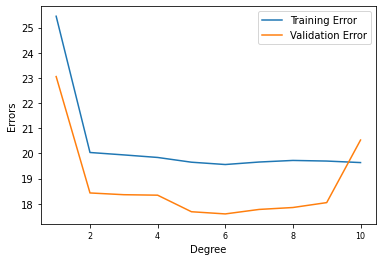

In [16]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['Degree'].values,df['Training Error'].values, label = 'Training Error')
ax.plot(df['Degree'].values,df['Validation Error'].values,label = 'Validation Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

Text(0, 0.5, 'Errors')

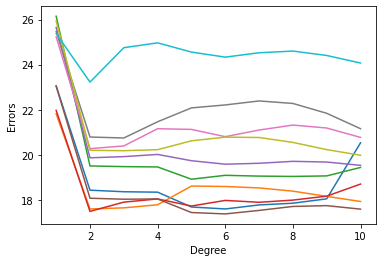

In [17]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
for j in range(1,11):
    from sklearn.model_selection import train_test_split
    X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.5, random_state=j)
    a=[]
    for i in range(1,11):
        a.append(create_polynomial_regression_model(i))
    df = pd.DataFrame(a,columns=['Training Error','Validation Error','Degree'])
    ax.plot(df['Degree'].values,df['Validation Error'].values, label = 'Training Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')

In [18]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
X = np.array([1, 2, 3, 4])
Y = np.array([5 ,6, 7, 8])
for train_index, validation_index in loo.split(X):
    X_train, X_valid = X[train_index], X[validation_index]
    Y_train, Y_valid = Y[train_index], Y[validation_index]
    print(X_train, X_valid, Y_train, Y_valid)

[2 3 4] [1] [6 7 8] [5]
[1 3 4] [2] [5 7 8] [6]
[1 2 4] [3] [5 6 8] [7]
[1 2 3] [4] [5 6 7] [8]


In [19]:
Y=np.array(auto['mpg'].values)
X=np.array(auto['horsepower'].values.reshape(-1,1))

In [24]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
LeaveOneOutErrors=[]
for train_index, validation_index in loo.split(X):
    X_train, X_valid = X[train_index], X[validation_index]
    Y_train, Y_valid = Y[train_index], Y[validation_index]
    LeaveOneOutErrors.append(create_polynomial_regression_model(4))
df = pd.DataFrame (LeaveOneOutErrors,columns=['Training Error','Validation Error','Degree'])
LeaveOneOutCV = df[['Training Error','Validation Error']].mean()  
LeaveOneOutCV  

Training Error      18.875652
Validation Error    19.424430
dtype: float64

In [21]:
df

,Training Error,Validation Error,Degree
0,23.889975,45.318538,1
1,23.889975,45.318538,1
2,23.690612,123.884653,1
3,23.637284,144.905192,1
4,23.707460,117.243677,1
...,...,...,...
387,23.802105,81.375536,1
388,23.763548,97.049885,1
389,23.853809,60.755188,1
390,23.763548,97.049885,1


In [25]:
loo = LeaveOneOut()
LeaveOneOutCV=[]
for j in range(1,12):
    LeaveOneOutErrors=[]
    for train_index, validation_index in loo.split(X):
        X_train, X_valid = X[train_index], X[validation_index]
        Y_train, Y_valid = Y[train_index], Y[validation_index]
        LeaveOneOutErrors.append(create_polynomial_regression_model(j))
        df = pd.DataFrame (LeaveOneOutErrors,columns=['Training Error','Validation Error','Degree'])
    LeaveOneOutCV.append([df['Validation Error'].mean(),df['Degree'][0]])  
LeaveOneOutCV_df = pd.DataFrame (LeaveOneOutCV,columns=['Validation Error','Degree'])
LeaveOneOutCV_df

,Validation Error,Degree
0,24.231514,1
1,19.248213,2
2,19.334984,3
3,19.424430,4
4,19.033196,5
5,19.006243,6
6,19.126250,7
7,19.224216,8
8,19.133951,9
9,18.946698,10


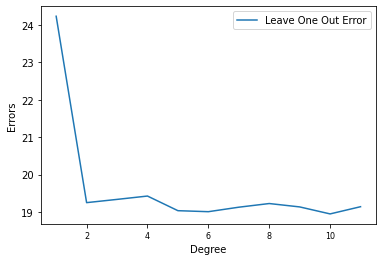

In [26]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(LeaveOneOutCV_df['Degree'].values,LeaveOneOutCV_df['Validation Error'].values,label = 'Leave One Out Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [29]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=False)
X = np.array([1, 2, 3, 4,5,6,7,8,9,10])
Y = np.array([11, 12, 13, 14,15,16,17,18,19,20])
for train_index, validation_index in cv.split(X):
    X_train, X_valid, Y_train, Y_valid = X[train_index], X[validation_index], Y[train_index], Y[validation_index]
    print(X_train, X_valid)
    print(Y_train, Y_valid)

[ 3  4  5  6  7  8  9 10] [1 2]
[13 14 15 16 17 18 19 20] [11 12]
[ 1  2  5  6  7  8  9 10] [3 4]
[11 12 15 16 17 18 19 20] [13 14]
[ 1  2  3  4  7  8  9 10] [5 6]
[11 12 13 14 17 18 19 20] [15 16]
[ 1  2  3  4  5  6  9 10] [7 8]
[11 12 13 14 15 16 19 20] [17 18]
[1 2 3 4 5 6 7 8] [ 9 10]
[11 12 13 14 15 16 17 18] [19 20]


In [30]:
Y=np.array(auto['mpg'].values)
X=np.array(auto['horsepower'].values.reshape(-1,1))

In [31]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=5, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X):
    X_train, X_valid, Y_train, Y_valid = X[train_index], X[validation_index], Y[train_index], Y[validation_index]
    CVErrors.append(create_polynomial_regression_model(2))
df = pd.DataFrame (CVErrors,columns=['Training Error','Validation Error','Degree'])
kfoldCV = df[['Training Error','Validation Error']].mean()  
kfoldCV  

Training Error      18.976282
Validation Error    19.044634
dtype: float64

In [32]:
df

,Training Error,Validation Error,Degree
0,17.779090,23.777949,2
1,19.062143,18.696477,2
2,19.900607,15.383232,2
3,18.025426,22.918436,2
4,20.114145,14.447078,2


In [33]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X):
    X_train, X_valid, Y_train, Y_valid = X[train_index], X[validation_index], Y[train_index], Y[validation_index]
    for j in range(1,12):
        CVErrors.append(create_polynomial_regression_model(j))
        df = pd.DataFrame (CVErrors,columns=['Training Error','Validation Error','Degree'])
df

,Training Error,Validation Error,Degree
0,22.802896,34.385717,1
1,17.707587,30.688621,2
2,17.589285,31.585373,3
3,17.567331,31.217024,4
4,17.223237,29.778151,5
...,...,...,...
105,18.339005,19.618579,7
106,18.511543,19.467054,8
107,18.512338,19.429979,9
108,18.381731,20.190551,10


In [34]:
kfoldCV_by_degree = df.groupby("Degree")
kfoldCV_by_degree = kfoldCV_by_degree.mean()
kfoldCV_by_degree = kfoldCV_by_degree.reset_index()
kfoldCV_by_degree[['Degree', 'Validation Error']]

,Degree,Validation Error
0,1,24.211786
1,2,19.318594
2,3,19.350347
3,4,19.371919
4,5,19.044633
5,6,18.934667
6,7,19.103742
7,8,19.221841
8,9,19.169031
9,10,19.085309


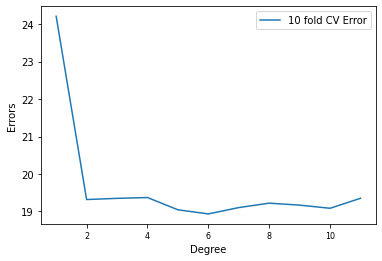

In [35]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV_by_degree['Degree'].values,kfoldCV_by_degree['Validation Error'].values,label = '10 fold CV Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')